# Synthesize a Table (TVAE)

In [1]:
%pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 106.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.5/201.5 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
real_data = pd.read_excel('/content/drive/MyDrive/Vezilka/SDV models/register-na-cvrst-otpad-2020-godina.xlsx')

In [3]:
real_data.head()

,Институција,Контакт лице,Адреса,е-пошта,Unnamed: 4,Број на дозвола,Шифри,Видови на отпад,m³,t,kg
0,АУТОМОТИВ ГРУП - Скопје,Кирил Калеников,ул.Скупиб.б,todor.dimovski@yahoo.com,45.11,57-567/1,130205,Моторномасло,NaN,6.900,NaN
1,АУТОМОТИВ ГРУП - Скопје,Кирил Калеников,ул.Скупиб.б,todor.dimovski@yahoo.com,45.11,57-567/1,150202,Отпаднифилтриодмасло и гориво,NaN,NaN,60
2,АУТОМОТИВ ГРУП - Скопје,Кирил Калеников,ул.Скупиб.б,todor.dimovski@yahoo.com,45.11,57-567/1,1,Комуналенотпад,NaN,1.500,NaN
3,АУТОМОТИВ ГРУП - Скопје,Кирил Калеников,ул.Скупиб.б,todor.dimovski@yahoo.com,45.11,57-567/1,160601,Акумулатори,NaN,2.175,NaN
4,АУТОМОТИВ ГРУП - Скопје,Кирил Калеников,ул.Скупиб.б,todor.dimovski@yahoo.com,45.11,57-567/1,170405,Отпадножелезо,NaN,NaN,247


In [4]:
real_data.drop(columns=["Unnamed: 4", "Број на дозвола", "Шифри"], inplace=True)

In [5]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(real_data)

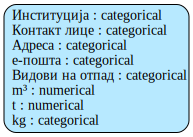

In [6]:
metadata.visualize()

Creating a Synthesizer

In [7]:
from sdv.single_table import TVAESynthesizer

synthesizer = TVAESynthesizer(metadata)
synthesizer.fit(real_data)

/usr/local/lib/python3.12/dist-packages/sdv/single_table/base.py:168: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.12/dist-packages/sdv/single_table/base.py:134: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Generating Synthetic Data

In [8]:
synthetic_data = synthesizer.sample(num_rows=500)
synthetic_data.head()

,Институција,Контакт лице,Адреса,е-пошта,Видови на отпад,m³,t,kg
0,Друштво за трговија со моторни возила и услуги...,Дејан Шошковски,ул. Скупи бр. 12,soskovski.dejna@hotmail.com,Измешанкомуналенотпад,NaN,0.005,NaN
1,Трговско друштво за трговија со возила и резер...,Дејан Шошковски,ул. Булевар „8 ми Септември“ бр. 21 Скопје,soskovski.dejna@hotmail.com,Измешанкомуналенотпад,NaN,NaN,NaN
2,Друштво за трговија со моторни возила и услуги...,Дејан Шошковски,ул. Скупи бр. 12,soskovski.dejna@hotmail.com,Отпадножелезо,NaN,0.005,NaN
3,Трговско друштво за трговија со возила и резер...,Дејан Шошковски,ул. Булевар „8 ми Септември“ бр. 21 Скопје,soskovski.dejna@hotmail.com,Пластика,NaN,NaN,NaN
4,Трговско друштво за трговија со возила и резер...,Дејан Шошковски,ул. Булевар „8 ми Септември“ бр. 21 Скопје,soskovski.dejna@hotmail.com,Измешанкомуналенотпад,NaN,10.146,NaN


Evaluating Real vs. Synthetic Data

In [9]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic = run_diagnostic(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 8/8 [00:00<00:00, 620.84it/s]|
Data Validity Score: 100.0%



/usr/local/lib/python3.12/dist-packages/sdmetrics/single_column/statistical/category_adherence.py:45: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  synthetic_data = synthetic_data.fillna(np.nan)


(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 193.01it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [10]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 8/8 [00:00<00:00, 519.93it/s]|
Column Shapes Score: 55.46%

(2/2) Evaluating Column Pair Trends: |██████████| 28/28 [00:00<00:00, 49.51it/s]|
Column Pair Trends Score: 51.05%

Overall Score (Average): 53.26%



In [11]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score,Error
0,Институција,TVComplement,0.707070,None
1,Контакт лице,TVComplement,0.726666,None
2,Адреса,TVComplement,0.715070,None
3,е-пошта,TVComplement,0.748787,None
4,Видови на отпад,TVComplement,0.397070,None
5,m³,KSComplement,0.166667,None
6,t,KSComplement,0.420710,None
7,kg,TVComplement,NaN,IncomputableMetricError: The TVComplement metr...


CTGAN Customization

In [16]:
custom_synthesizer = TVAESynthesizer(
    metadata,
    epochs=1000,
    verbose=True)
custom_synthesizer.fit(real_data)

/usr/local/lib/python3.12/dist-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.

Loss: 4.568: 100%|██████████| 1000/1000 [00:13<00:00, 73.94it/s]


In [17]:
synthetic_data_customized = custom_synthesizer.sample(num_rows=500)

quality_report = evaluate_quality(
    real_data,
    synthetic_data_customized,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 8/8 [00:00<00:00, 338.77it/s]|
Column Shapes Score: 68.35%

(2/2) Evaluating Column Pair Trends: |██████████| 28/28 [00:00<00:00, 45.16it/s]|
Column Pair Trends Score: 77.34%

Overall Score (Average): 72.85%

